In [1]:
import time
import torch
import VGPAE_classifier
from utils import get_dataloader, backtrans, imshow
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.set_printoptions(precision=4)
import classifier

activFunName = 'lrelu'  # tanh used in the synthetics
activations_list = {
    'softplus': nn.Softplus(),
    'lrelu': nn.LeakyReLU(),
    'relu': nn.ReLU()
}
activFun = activations_list[activFunName]
classes = [str(i) for i in range(10)]


In [2]:
# load data
batch_size_train = 1000
dataset = 'MNIST'
train_loader, ds = get_dataloader(dataset, batch_size_train,False)
# initialize model

latent_dim1 = 10
latent_dim2 = 2
in_channel = 1
enc = classifier.ModelCNN()
enc.load_state_dict(torch.load('best_model_cnn.pt'))
enc.eval()
model = VGPAE_classifier.VGPAE_v3(in_channel, latent_dim1, latent_dim2, activFun, enc, 28)
model_file = 'models/MNIST_VGPAE_v3_10_2fixwu_w1.0_loss_function_30000_2.pth'
model.load_state_dict(torch.load(model_file))
model.eval();

tensor([0.8875, 0.5527], grad_fn=<SoftplusBackward>)
tensor([[1.6346, 1.8023]], grad_fn=<ExpBackward>)
tensor([0.1475, 0.0031], grad_fn=<ExpBackward>)
tensor(0.0752)


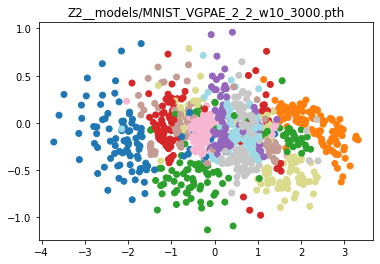

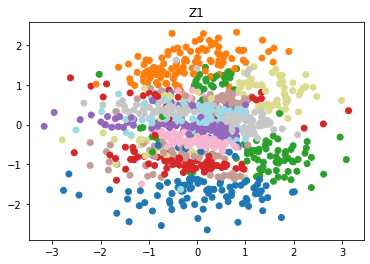

In [39]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)
plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z1')
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)


<AxesSubplot:>

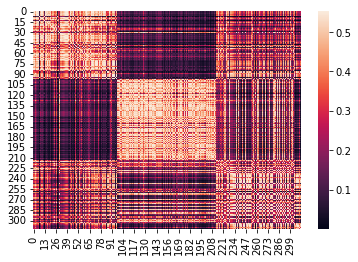

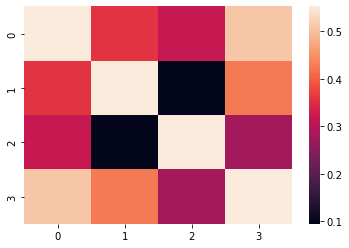

In [13]:
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])
plt.figure()
index = zero + two
index = [1,56,28,25]
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])

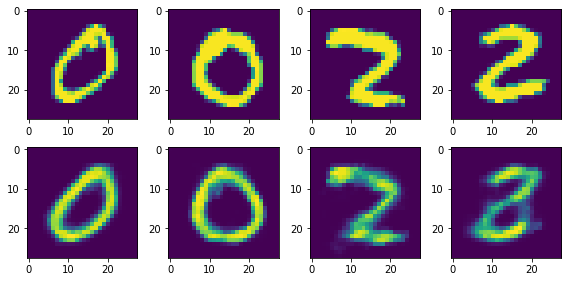

In [37]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


tensor([0.4902, 0.5178], grad_fn=<SoftplusBackward>)
tensor([[1.5313, 1.6344]], grad_fn=<ExpBackward>)
tensor([0.2014, 0.0031], grad_fn=<ExpBackward>)


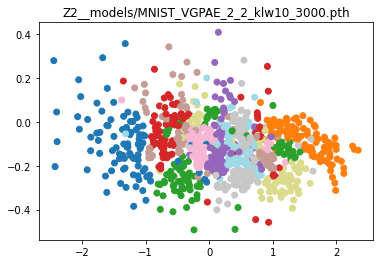

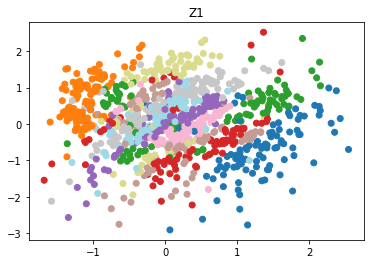

In [41]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)
plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z1')
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)


<AxesSubplot:>

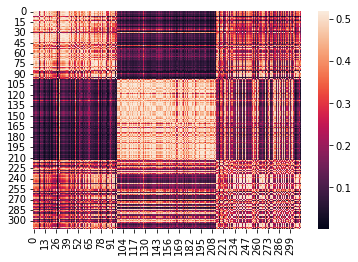

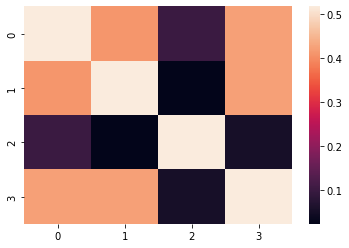

In [42]:
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])
plt.figure()
index = zero + two
index = [1,56,28,25]
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])

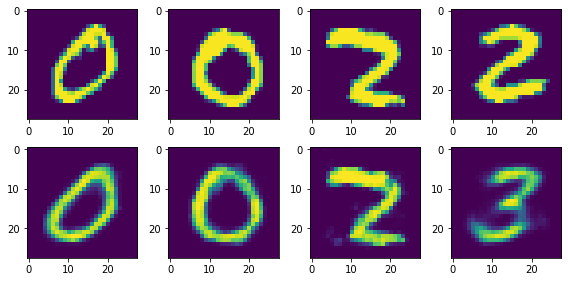

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


tensor([0.3553, 0.6276, 0.3575, 0.2839, 0.4630], grad_fn=<SoftplusBackward>)
tensor([[3.4208, 3.1268, 2.4999, 2.2327, 2.9974]], grad_fn=<ExpBackward>)
tensor([1.1030, 0.9535, 1.1722, 0.2031, 0.5108], grad_fn=<ExpBackward>)


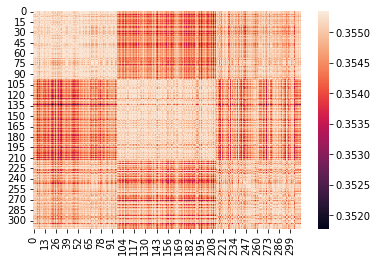

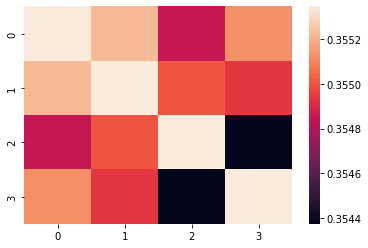

In [62]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two

sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0])
plt.figure()

# index = zero + two
index = [1,56,28,25]
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0])
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

In [58]:
print(f"z1_mu_mean:{z1_mu.mean(dim=0).numpy()}, z1_mu_var:{z1_mu.var(dim=0).numpy()}")
print(f"z1_var_mean:{log_z1_var.exp().mean(dim=0).numpy()}, z1_var_var:{log_z1_var.exp().var(dim=0).numpy()}")

z1_mu_mean:[ 0.002  -0.0212  0.0092  0.0002  0.0254], z1_mu_var:[0.0015 0.0013 0.002  0.0015 0.0014]
z1_var_mean:[0.973  0.9984 0.9902 0.9787 0.9699], z1_var_var:[0.0017 0.0027 0.0023 0.0038 0.0019]


In [59]:
print(f"z2_mu_mean:{z2_mu.mean(dim=0).numpy()}, z2_mu_var:{z2_mu.var(dim=0).numpy()}")
print(f"z2_var_mean:{log_z2_var.exp().mean(dim=0).numpy()}, z2_var_var:{log_z2_var.exp().var(dim=0).numpy()}")

z2_mu_mean:[ 0.0387  0.0804 -0.1143 -0.1374 -0.0094], z2_mu_var:[1.0828 0.9779 1.1679 0.1732 0.4551]
z2_var_mean:[0.0519 0.0284 0.0262 0.0519 0.0722], z2_var_var:[0.0057 0.0007 0.0003 0.0027 0.01  ]


In [61]:
torch.inverse(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0]+torch.eye(312))

tensor([[ 0.9967, -0.0033, -0.0032,  ..., -0.0032, -0.0033, -0.0032],
        [-0.0033,  0.9965, -0.0033,  ..., -0.0031, -0.0035, -0.0035],
        [-0.0032, -0.0033,  0.9967,  ..., -0.0031, -0.0034, -0.0033],
        ...,
        [-0.0032, -0.0031, -0.0031,  ...,  0.9967, -0.0030, -0.0032],
        [-0.0033, -0.0035, -0.0034,  ..., -0.0030,  0.9965, -0.0034],
        [-0.0032, -0.0035, -0.0033,  ..., -0.0032, -0.0034,  0.9963]])

KL(q(Z2|X)||p(Z2|Z1)) where p(Z2|Z1) is Gaussian prior N(0,K). The Covariance matrix learned by model is not diagnoal but it's equivalent to diagonal which made the Gaussian prior equivalent to a isotropic Gaussian distribution as

$logp(Z_2) = - (Z_2-0)^T(K_{learned} + \sigma^2 I)^{-1}(Z_2-0) + other terms  $



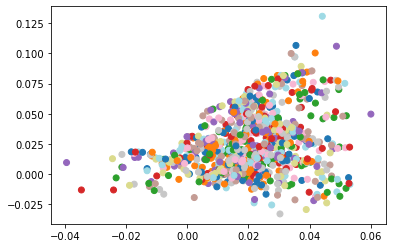

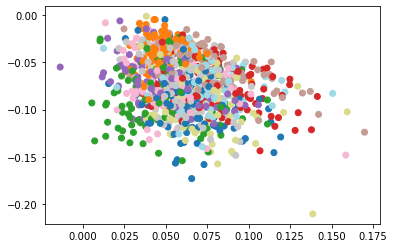

In [63]:

batch_size_train = 1000

dataset = 'MNIST'
train_loader = get_dataloader(dataset, batch_size_train,False)
# initialize model

latent_dim1 = 2
latent_dim2 = 2
in_channel = 1
model = VGPAE_td.VGPAEtd(in_channel, latent_dim1, latent_dim2, activFun, 28)
model.load_state_dict(torch.load('models/MNIST_VGPAEtd_2_2_w10_3000.pth'))
model.eval();

Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1],c = Label, label =Label, cmap='tab20')

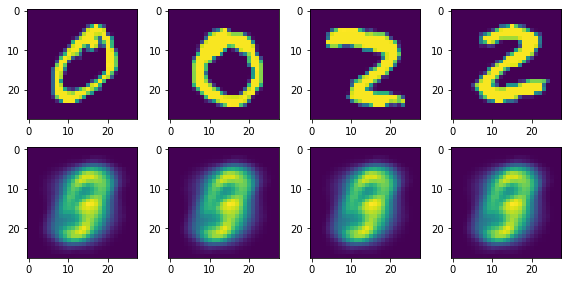

In [64]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


In [90]:
# load data
batch_size_train = 1000
dataset = 'MNIST'
train_loader = get_dataloader(dataset, batch_size_train,False)
# initialize model

latent_dim1 = 5
latent_dim2 = 5
in_channel = 1
model = VGPAE.VGPAE(in_channel, latent_dim1, latent_dim2, activFun, 28)
model_file = 'models/MNIST_VGPAE_5_5wu_w10.0_loss_function_3000.pth'
model.load_state_dict(torch.load(model_file))
model.eval();

tensor([2.0507, 2.1632], grad_fn=<SoftplusBackward>)
tensor([[2.4139, 1.7373]], grad_fn=<ExpBackward>)
tensor([0.1842, 0.1390], grad_fn=<ExpBackward>)


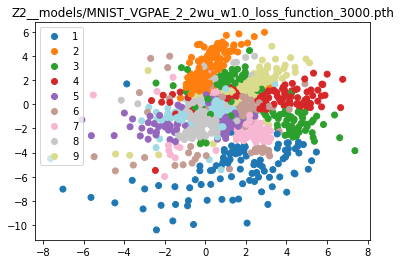

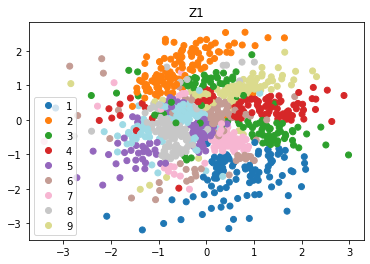

In [79]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
scatter = plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.figure()

scatter = plt.scatter(z1_mu[:,0],z1_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z1')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)


<AxesSubplot:>

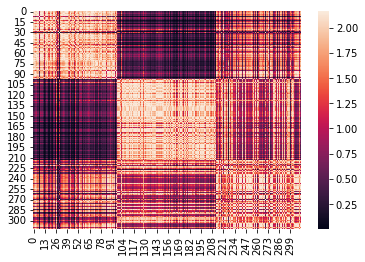

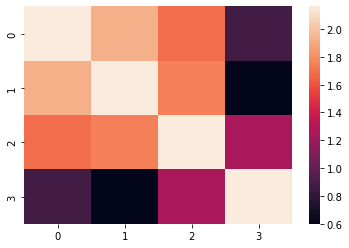

In [68]:
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])
plt.figure()
index = zero + two
index = [1,56,28,25]
sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1])

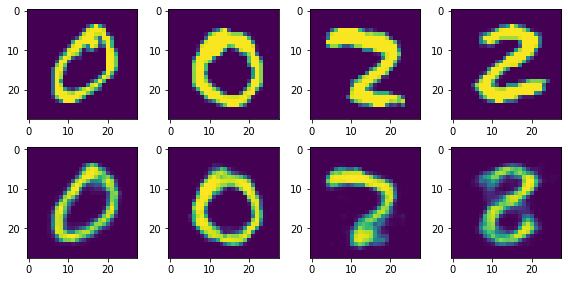

In [80]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


models/MNIST_VGPAE_5_5wu_w10.0_loss_function_3000.pth
tensor([0.4053, 0.6644, 0.4464, 0.3807, 0.4790], grad_fn=<SoftplusBackward>)
tensor([[3.5850, 3.3756, 2.7806, 2.5939, 3.1782]], grad_fn=<ExpBackward>)
tensor([0.3382, 0.2286, 0.2868, 0.2682, 0.2517], grad_fn=<ExpBackward>)


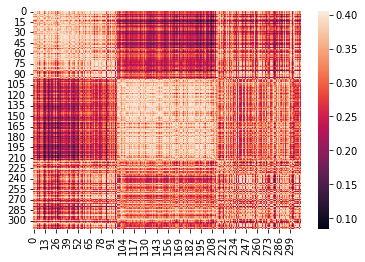

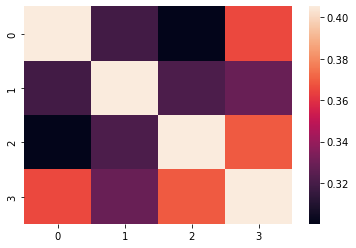

In [96]:
print(model_file)
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two

sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0])
plt.figure()

# index = zero + two
ind = [1,56,28,25]
sns.heatmap(model.covar_module(z1_mu[ind],z1_mu[ind]).evaluate().detach()[0])
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

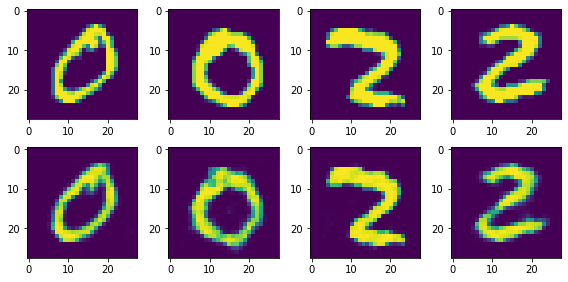

In [93]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


In [94]:
print(f"z1_mu_mean:{z1_mu.mean(dim=0).numpy()}, z1_mu_var:{z1_mu.var(dim=0).numpy()}")
print(f"z1_var_mean:{log_z1_var.exp().mean(dim=0).numpy()}, z1_var_var:{log_z1_var.exp().var(dim=0).numpy()}")
print(f"z2_mu_mean:{z2_mu.mean(dim=0).numpy()}, z2_mu_var:{z2_mu.var(dim=0).numpy()}")
print(f"z2_var_mean:{log_z2_var.exp().mean(dim=0).numpy()}, z2_var_var:{log_z2_var.exp().var(dim=0).numpy()}")

z1_mu_mean:[-0.0104 -0.0192 -0.0325 -0.0134  0.0222], z1_mu_var:[0.0016 0.0048 0.5558 0.6365 0.3987]
z1_var_mean:[0.9483 0.9643 0.3875 0.3445 0.5531], z1_var_var:[0.0068 0.0072 0.0058 0.0076 0.007 ]
z2_mu_mean:[ 0.0361 -0.0093 -0.1822 -0.3174  0.0054], z2_mu_var:[0.3408 0.4982 0.6759 0.3098 0.5733]
z2_var_mean:[0.0267 0.0182 0.0195 0.0398 0.0415], z2_var_var:[0.0017 0.0001 0.0002 0.0012 0.0031]


In [104]:
torch.inverse(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[1]+torch.eye(312))

tensor([[ 9.9010e-01, -9.9441e-03, -8.2607e-03,  ..., -6.8072e-05,
         -2.3446e-03, -1.9424e-03],
        [-9.9442e-03,  9.8845e-01, -6.4554e-03,  ..., -8.0942e-04,
         -4.2914e-03, -4.1302e-03],
        [-8.2606e-03, -6.4555e-03,  9.8917e-01,  ...,  6.9258e-04,
         -2.0241e-03,  1.4366e-04],
        ...,
        [-6.8062e-05, -8.0941e-04,  6.9251e-04,  ...,  9.7891e-01,
         -2.2343e-02,  1.8198e-03],
        [-2.3446e-03, -4.2914e-03, -2.0240e-03,  ..., -2.2343e-02,
          9.5443e-01,  8.4885e-04],
        [-1.9424e-03, -4.1303e-03,  1.4365e-04,  ...,  1.8199e-03,
          8.4887e-04,  9.6666e-01]])

Text(0.5, 1.0, 'Z2__models/MNIST_VGPAE_v2_10_2wu_w0.0_loss_function_3000_1.pth')

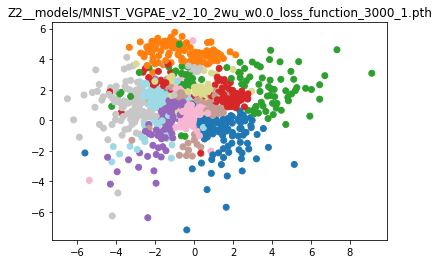

In [39]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, = model(Data)
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)



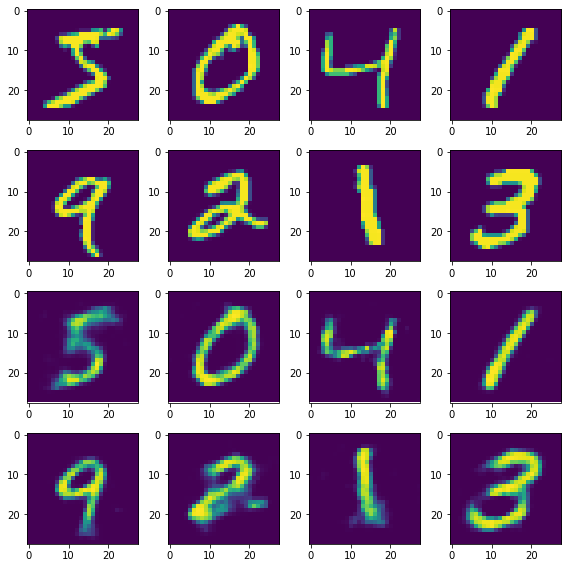

In [40]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
img_rec = backtrans(recon[:8],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[:8],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Z2__models/MNIST_VGPAE_v2_10_2wu_w1_loss_function_3000_1.pth')

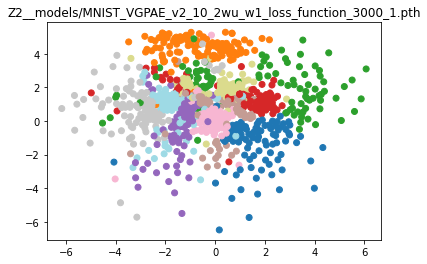

In [9]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, = model(Data)
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)



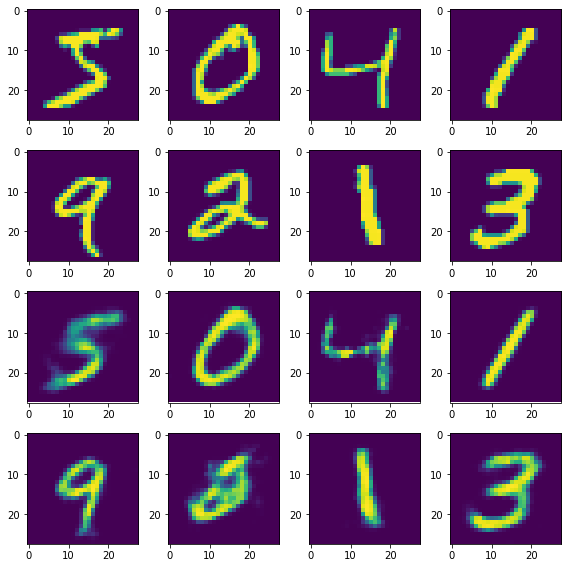

In [32]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
img_rec = backtrans(recon[:8],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[:8],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


tensor([1.8767, 2.1362], grad_fn=<SoftplusBackward>)
tensor([[5.4857, 5.2757, 5.3124, 6.3239, 5.6104, 5.5242, 6.1061, 5.4647, 5.3693,
         5.8817]], grad_fn=<ExpBackward>)
tensor([0.2692, 0.2318], grad_fn=<ExpBackward>)


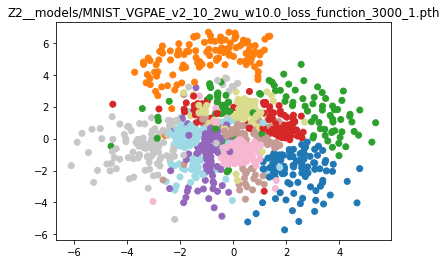

In [43]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, = model(Data)
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

In [48]:
n_x = len(Data)
sig_y = model.noise.clone()
eye = torch.eye(n_x)
batch_eye = eye.expand(model.latent_dim2, n_x, n_x).clone()
noise = sig_y.view(-1, 1, 1) * batch_eye
kernel = model.covar_module(z1, z1).evaluate() + noise

k_inv = torch.inverse(kernel)

In [54]:
np.round(kernel.detach().numpy(),4)[0][0]

array([4.9423e+00, 1.3000e-03, 1.2000e-03, 8.0000e-04, 3.1000e-03,
       2.1400e-02, 2.6000e-03, 5.5700e-02, 3.2000e-03, 0.0000e+00,
       4.7500e-01, 1.1139e+00, 6.2600e-02, 4.0000e-04, 2.3000e-03,
       6.0000e-04, 5.1000e-03, 7.0700e-02, 5.0000e-02, 2.3700e-02,
       2.3000e-03, 1.1400e-02, 4.8800e-02, 5.0000e-04, 2.3000e-03,
       1.7000e-03, 1.9000e-03, 3.0600e-02, 1.1100e-02, 2.5400e-02,
       3.5540e-01, 5.3400e-02, 4.5000e-03, 1.3100e-02, 2.8000e-03,
       1.7094e+00, 2.8500e-02, 8.0000e-03, 0.0000e+00, 3.5000e-03,
       2.3000e-03, 2.0600e-02, 7.3000e-03, 1.0200e-02, 8.5900e-02,
       6.8000e-03, 2.7000e-02, 2.7270e-01, 1.9520e-01, 3.0470e-01,
       1.0342e+00, 7.3000e-03, 7.4000e-03, 2.0000e-04, 1.4000e-03,
       6.1800e-02, 6.6000e-03, 5.3000e-03, 2.5000e-03, 1.3000e-03,
       2.6000e-03, 6.0000e-04, 3.3000e-02, 3.6600e-02, 1.0000e-04,
       2.2142e+00, 4.7000e-03, 7.8000e-03, 1.1900e-02, 2.6700e-02,
       1.1300e-02, 1.4000e-03, 2.5000e-03, 3.7000e-03, 2.7250e

In [50]:
np.round(k_inv.detach().numpy(),2)[0][0]

array([ 1.13, -0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  ,
        0.  ,  0.01, -0.01, -0.01, -0.  , -0.  ,  0.  ,  0.  , -0.  ,
        0.  , -0.  , -0.  ,  0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  ,
        0.01,  0.  ,  0.  ,  0.02,  0.  , -0.  ,  0.  , -0.  ,  0.02,
        0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  ,
        0.  , -0.  ,  0.  , -0.  ,  0.  , -0.03,  0.  ,  0.  , -0.  ,
       -0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ,
       -0.  ,  0.  , -0.07, -0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,
        0.  , -0.  , -0.01,  0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.01,
        0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.03,  0.  ,  0.  , -0.  ,
       -0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ,  0.01,
       -0.  ,  0.02,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,
       -0.  , -0.  , -0.  , -0.  , -0.  ,  0.  , -0.  , -0.  ,  0.  ,
       -0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,
        0.  , -0.  ,

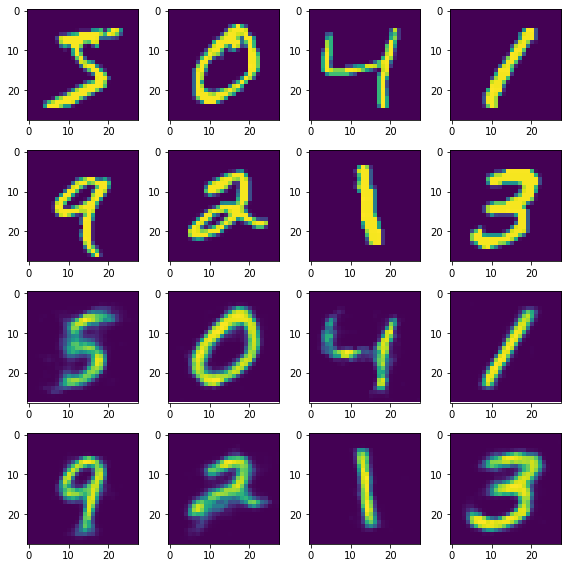

In [36]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
img_rec = backtrans(recon[:8],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[:8],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


tensor([0.9208, 1.0345], grad_fn=<SoftplusBackward>)
tensor([[1.0777, 1.0357, 0.9462, 1.1799, 0.9619, 1.0123, 1.0674, 1.0099, 1.1104,
         1.0175]], grad_fn=<ExpBackward>)
tensor([0.9872, 0.9756], grad_fn=<ExpBackward>)


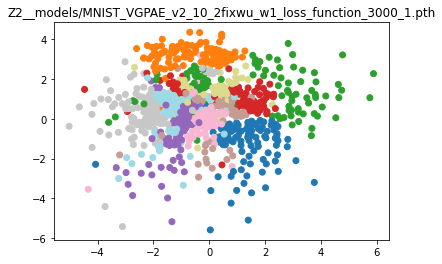

In [3]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, = model(Data)
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

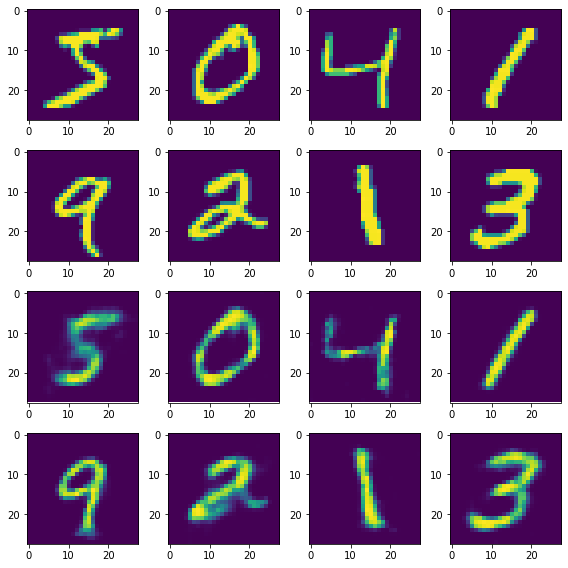

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
img_rec = backtrans(recon[:8],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[:8],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


tensor([4.1644, 5.1503], grad_fn=<SoftplusBackward>)
tensor([[ 6.4843,  9.3964,  7.6847,  6.8167,  6.9063,  7.1180, 11.5701,  8.4758,
          8.4588, 10.2160]], grad_fn=<ExpBackward>)
tensor([0.9726, 0.5129], grad_fn=<ExpBackward>)


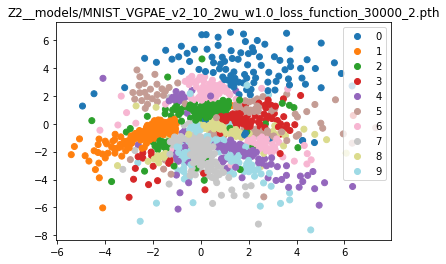

In [30]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, = model(Data)
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')

plt.title('Z2__' + model_file)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)


print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

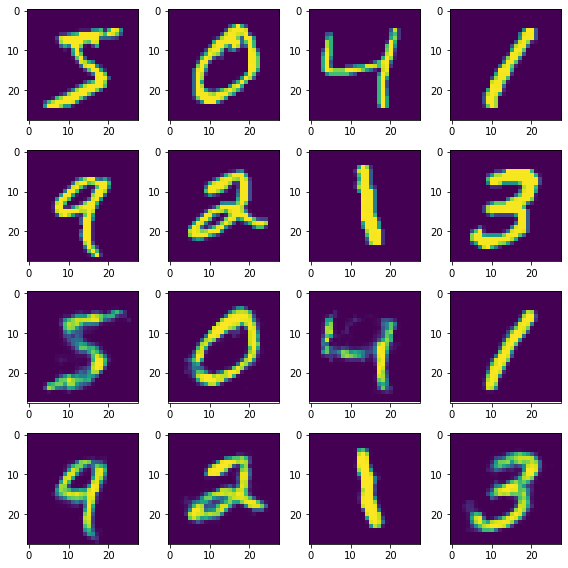

In [22]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
img_rec = backtrans(recon[:8],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[:8],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


tensor([6.5607, 4.5514], grad_fn=<SoftplusBackward>)
tensor([[ 7.8804,  7.9768, 10.0943,  8.9481,  9.4960,  9.8309, 11.8849,  8.3548,
         11.3022, 13.6279]], grad_fn=<ExpBackward>)
tensor([0.6277, 0.4544], grad_fn=<ExpBackward>)


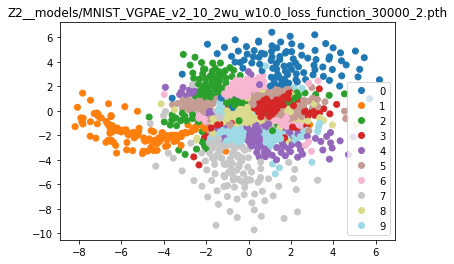

In [41]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, = model(Data)
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')

plt.title('Z2__' + model_file)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)


print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

tensor([4.6099, 7.5209], grad_fn=<SoftplusBackward>)
tensor([[ 7.0506,  8.4432,  9.9364,  8.7356, 10.3346,  7.4105,  8.9036,  8.7592,
          7.6173, 15.9940]], grad_fn=<ExpBackward>)
tensor([0.3325, 0.7553], grad_fn=<ExpBackward>)


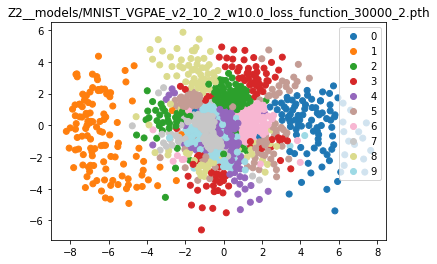

In [6]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, = model(Data)
scatter = plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')

plt.title('Z2__' + model_file)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)


print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

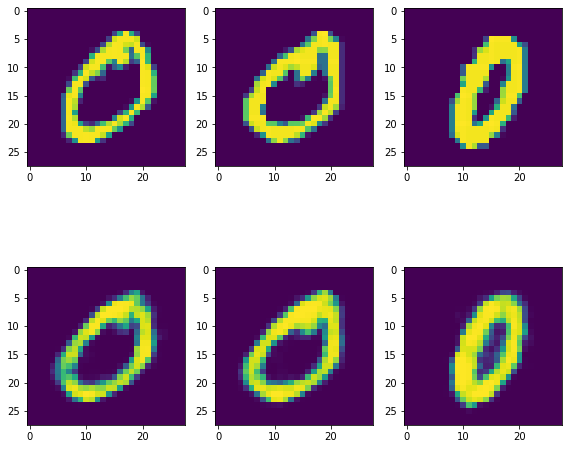

In [7]:
index = [1,21,34]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img = np.concatenate([img_real,img_rec],axis=0)
n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


In [8]:
print(z1[1])
print(z1[21])
print(z1[34])



tensor([ 13.0449, -12.1996,  -3.2041,  -7.8551,  -7.7739,  -5.8688,  -1.6905,
         -8.5260,  -4.3298,  -0.0656])
tensor([  9.9390, -10.6304,  -2.7481,  -3.5063,  -6.1929,  -4.2559,  -1.6700,
         -7.0387,  -4.0719,  -0.9767])
tensor([10.4827, -2.3824, -3.9949, -9.1779, -9.0124, -4.1419, -1.8298, -3.8656,
        -2.7783, -2.5286])


In [11]:
torch.std(z1,dim=0)

tensor([7.4800, 7.6739, 6.6189, 7.1939, 8.0948, 6.3739, 9.3875, 7.4407, 5.2405,
        5.5912])

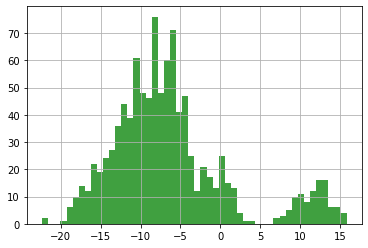

In [66]:
import numpy as np
import matplotlib.pyplot as plt

x = z1[:,0].numpy()

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75)

plt.grid(True)
plt.show()

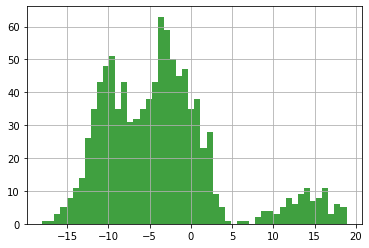

In [67]:
x = z1[:,3].numpy()

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=False, facecolor='g', alpha=0.75)

plt.grid(True)
plt.show()

tensor([5.0096, 5.0080], grad_fn=<SoftplusBackward>)
tensor([[15.0193, 14.9781, 14.9947, 15.0083, 15.0067, 14.9969, 15.0031, 14.9879,
         14.9968, 15.0001]], grad_fn=<ExpBackward>)
tensor([0.5143, 0.4927], grad_fn=<ExpBackward>)


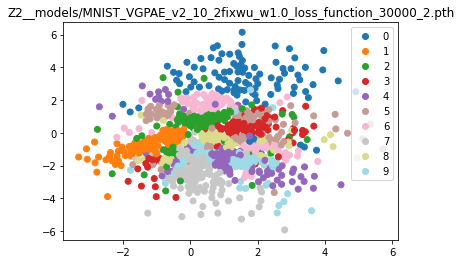

In [65]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, = model(Data)
scatter = plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')

plt.title('Z2__' + model_file)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)


print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)


tensor([5.0096, 5.0080], grad_fn=<SoftplusBackward>)
tensor([[15.0193, 14.9781, 14.9947, 15.0083, 15.0067, 14.9969, 15.0031, 14.9879,
         14.9968, 15.0001]], grad_fn=<ExpBackward>)
tensor([0.5143, 0.4927], grad_fn=<ExpBackward>)


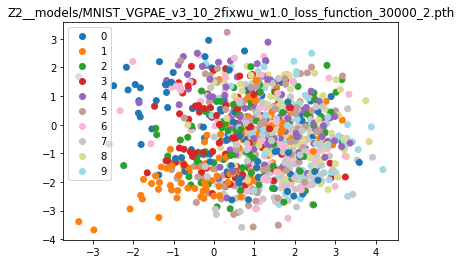

In [3]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, = model(Data)
scatter = plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')

plt.title('Z2__' + model_file)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)


print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)
